# Image Processing Filters

Filters are mathematical operations that produce a new image out of one or more images. Pixel values between input and output images may differ.

This notebook was modified from [a notebook written by Marcelo Leomil Zoccoler](https://github.com/BiAPoL/Quantitative_Bio_Image_Analysis_with_Python_2022/blob/6238ab8bc8278510ac0805776fcddf7368536b9c/docs/day1z_Image_Filters/09_Image_Filters.ipynb) licensed [CC-BY 4.0](https://github.com/BiAPoL/Quantitative_Bio_Image_Analysis_with_Python_2022/blob/main/LICENSE-CC-BY).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import data
from skimage import filters
from skimage import morphology
import stackview
from stackview import imshow

To demonstrate what specific filters do, we start with a very simple image. It contains a lot of zeros and a single pixel with value `1` in the middle.

In [2]:
image1 = np.zeros((5, 5))
image1[2, 2] = 1
image1

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

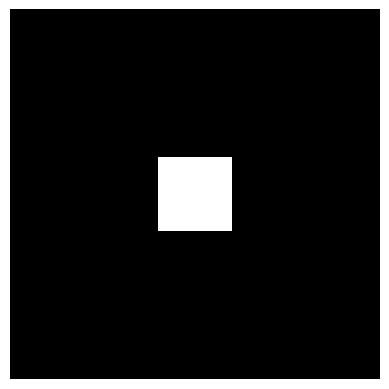

In [3]:
imshow(image1)

## Gaussian kernel
To apply a _Gaussian blur_ to an image, we convolve it using a Gaussian kernel. The function [`gaussian` in scikit-image](https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian) can do this for us.

In [17]:
blurred = filters.gaussian(image1, sigma=1)

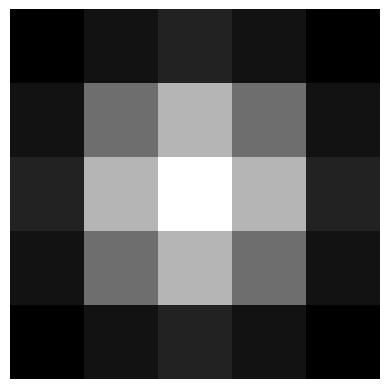

In [5]:
imshow(blurred)

## Interactive filter parameter tuning
To understand better what filters are doing, it shall be recommended to apply them interactively. The following code will not render on github.com. You need to execute the notebook locally use this interactive user-interface.

In [6]:
image3 = imread('data/mitosis_mod.tif').astype(float)

In [7]:
stackview.interact(filters.gaussian, image3, zoom_factor=4)

## Denoising
Common filters for denoising images are the mean filter, the median filter and the Gaussian filter.

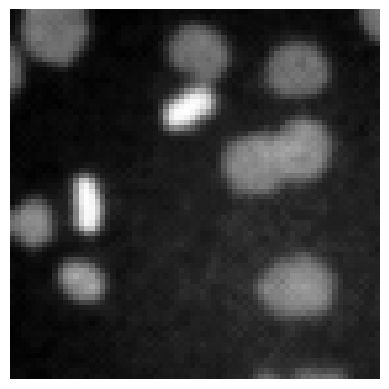

In [8]:
denoised_mean = filters.rank.mean(image3.astype(np.uint8), morphology.disk(1))

imshow(denoised_mean)

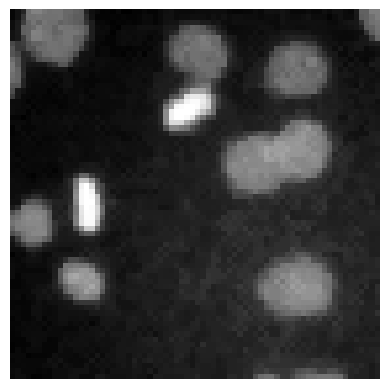

In [9]:
denoised_median = filters.median(image3, morphology.disk(1))

imshow(denoised_median)

In [10]:
def custom_median(image, radius:int):
    return filters.median(image, morphology.disk(radius))

stackview.interact(custom_median, image3, zoom_factor=4)

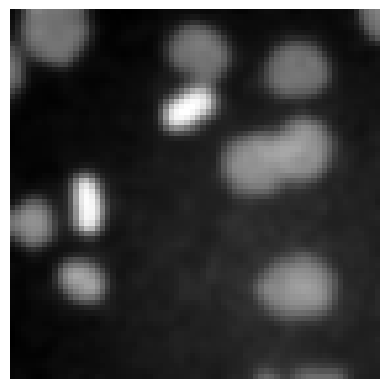

In [11]:
denoised_gaussian = filters.gaussian(image3, sigma=1)

imshow(denoised_gaussian)

We can also show these images side-by-side using matplotlib.

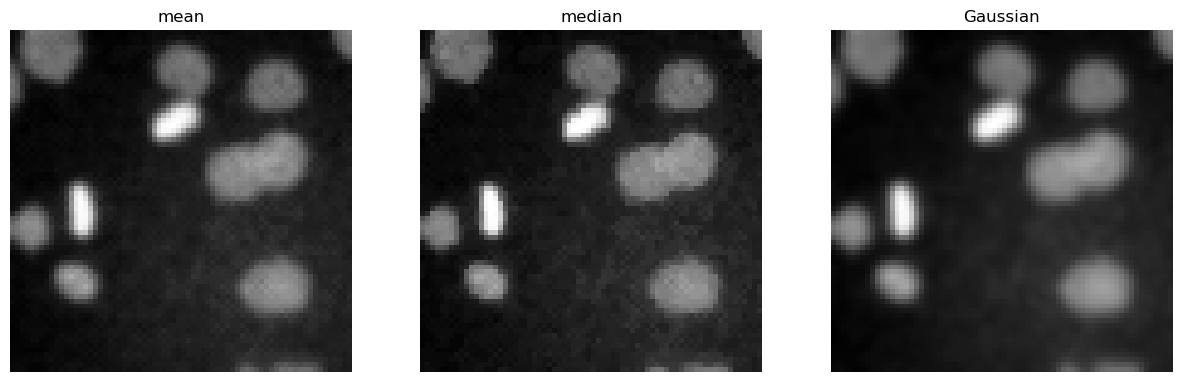

In [12]:
fig, axes = plt.subplots(1,3, figsize=(15,15))

stackview.imshow(denoised_mean, plot=axes[0], title="mean")
stackview.imshow(denoised_median, plot=axes[1], title="median")
stackview.imshow(denoised_gaussian, plot=axes[2], title="Gaussian")

### Top-hat filtering / background removal

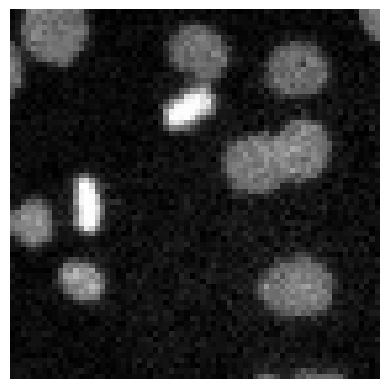

In [13]:
top_hat = morphology.white_tophat(image3, morphology.disk(15))

imshow(top_hat)

# Exercise

Write a function that computes the [Difference of Gaussian](https://en.wikipedia.org/wiki/Difference_of_Gaussians). 

In [14]:
def difference_of_gaussian(image, sigma1, sigma2):
    
    # enter code here
    filtered_image = image
    
    return filtered_image

Use a simple function call to try out the function.

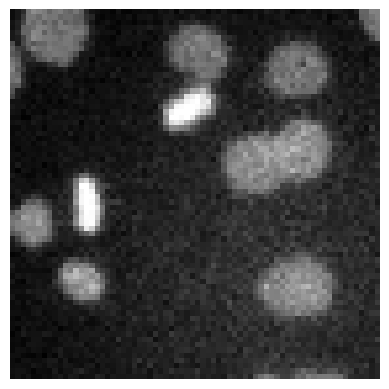

In [15]:
dog_image = difference_of_gaussian(image3, 1, 5)

imshow(dog_image)

Use the [stackview](https://github.com/haesleinhuepf/stackview) library to play with it interactively.

In [16]:
stackview.interact(difference_of_gaussian, image3)